In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt

# Implementacja

In [2]:
class SchellingAutomaton:
    def __init__(self, size: int, init_prob: float, min_n_neigh: int, types: list[int] = (1, 2)) -> None:
        np.random.seed(42)
        random.seed(42)
        
        self.size = size
        self.init_prob = init_prob
        self.min_n_neigh = min_n_neigh
        self.types = types

        self.map = np.zeros((self.size, self.size))
        self.original_map = np.zeros((self.size, self.size))
        self.agents = {t: [] for t in self.types}
        self.init_agents()
        self.n_neigh_graph = {}

    def init_agents(self) -> None:
        # generate map
        self.map = np.random.choice(self.types, size=(self.size, self.size)).astype(np.int8)
        mask = np.random.random((self.size, self.size))
        self.map[mask > self.init_prob] = 0
        self.original_map = np.copy(self.map)

        # generate agents based on the map
        for x in range(self.size):
            for y in range(self.size):
                type_ = self.map[x, y]
                if type_ > 0:
                    self.agents[type_].append((x, y))

    def simulate_turn(self, i_turn: int = 0) -> None:
        n_neigh_list = []
        for type_, agents in self.agents.items():
            for i, agent_position in enumerate(agents):
                agent_neigh = self._generate_neigh(*agent_position)
                n_neigh = self._count_neighbors(type_, agent_neigh)
                n_neigh_list.append(n_neigh)

                if n_neigh < self.min_n_neigh:
                    new_position = random.choice(agent_neigh)
                    if self.map[new_position] == 0:  # new position is empty - agent can move
                        agents[i] = new_position
                        self.map[agent_position] = 0
                        self.map[new_position] = type_
                        
        self.n_neigh_graph[i_turn] = np.average(n_neigh_list)

    def run(self, n: int) -> None:
        for i in range(n):
            self.simulate_turn(i + 1)
        return self

    def _count_neighbors(self, t: int, neigh: list[tuple[int, int]]) -> int:
        count = 0
        for x, y in neigh:
            if self.map[x, y] == t:
                count += 1
        return count

    def _generate_neigh(self, x: int, y: int) -> list[tuple[int, int]]:
        neigh = [(x - 1, y), (x - 1, y + 1), (x, y + 1), (x + 1, y + 1), (x + 1, y), (x + 1, y - 1), (x, y - 1), (x - 1, y - 1)]
        return [(new_x % self.size, new_y % self.size) for new_x, new_y in neigh]

# Testy

In [3]:
def show_results(A: SchellingAutomaton):
    plt.figure(figsize=(14, 4.5))
    
    # original map
    plt.subplot(1, 3, 1)
    plt.imshow(A.original_map, cmap='plasma', origin='lower')
    plt.title('Original Map')
    # plt.colorbar()
    
    # map
    plt.subplot(1, 3, 2)
    plt.imshow(A.map, cmap='plasma', origin='lower')
    plt.title('Final Map')
    # plt.colorbar()
    
    # s graph
    plt.subplot(1, 3, 3)
    plt.title('Average s Evolution')
    plt.plot(A.n_neigh_graph.keys(), A.n_neigh_graph.values())
    plt.xlabel('turn')
    plt.ylabel('average s')
    plt.grid()
    
    rho = r'$\rho$'
    alpha = r'$\alpha$'
    plt.suptitle(f"{len(A.types)} types; size: {A.size}; {rho}: {A.init_prob}; {alpha}: {A.min_n_neigh}")
    plt.tight_layout()
    
    plt.show()

## 2 typy

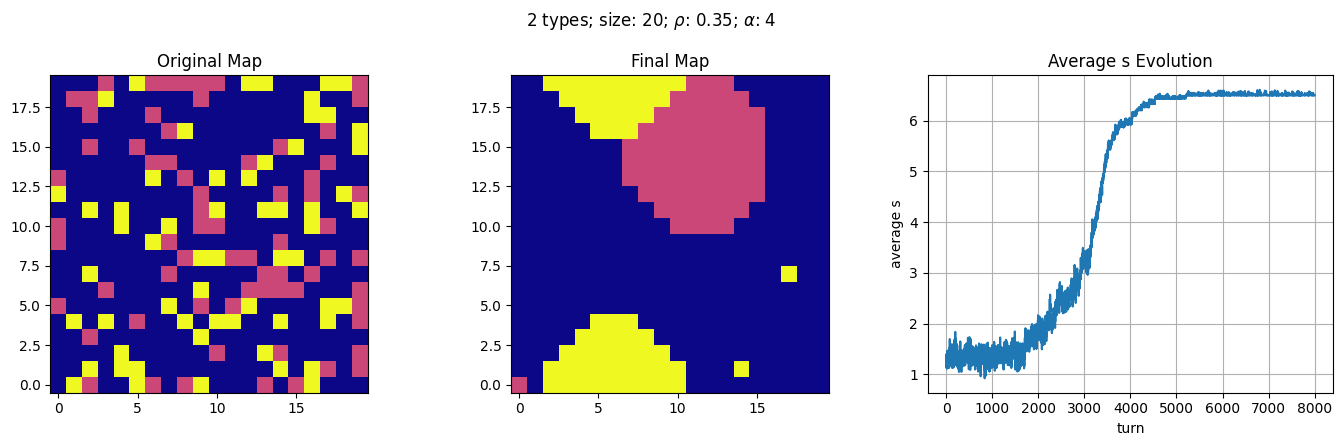

In [4]:
A = SchellingAutomaton(size=20, init_prob=0.35, min_n_neigh=4, types=[1, 2]).run(8000)
show_results(A)
# Segregacja widoczna po 4000 turach

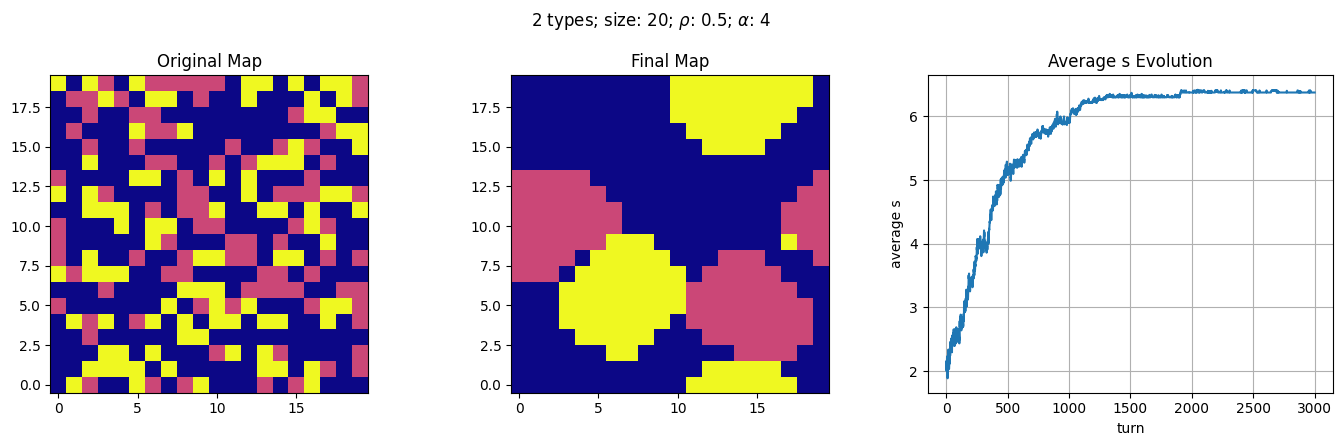

In [5]:
A = SchellingAutomaton(size=20, init_prob=0.5, min_n_neigh=4, types=[1, 2]).run(3000)
show_results(A)
# Segregacja widoczna po 1000 turach

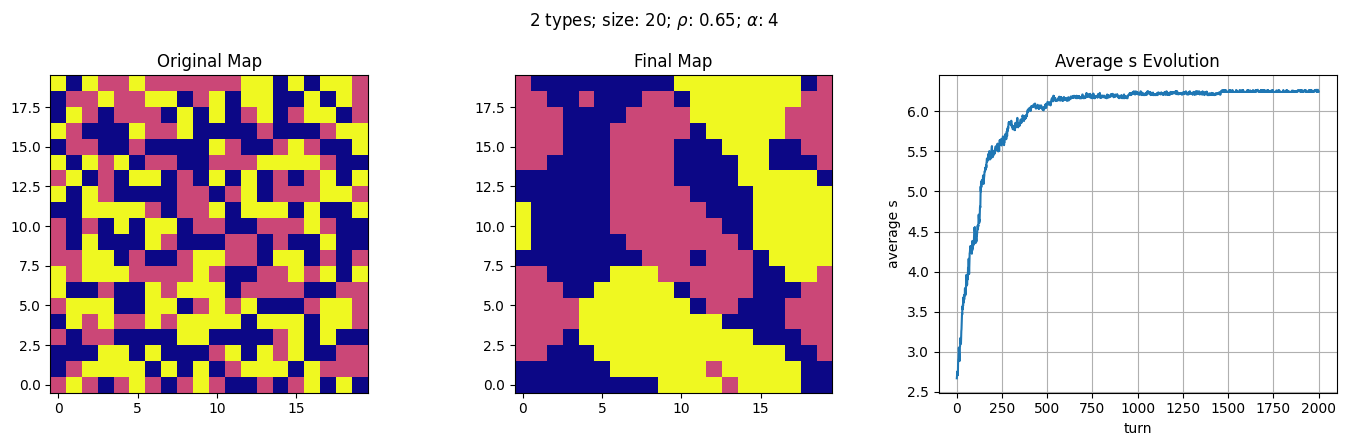

In [6]:
A = SchellingAutomaton(size=20, init_prob=0.65, min_n_neigh=4, types=[1, 2]).run(2000)
show_results(A)
# Segregacja widoczna po 500 turach

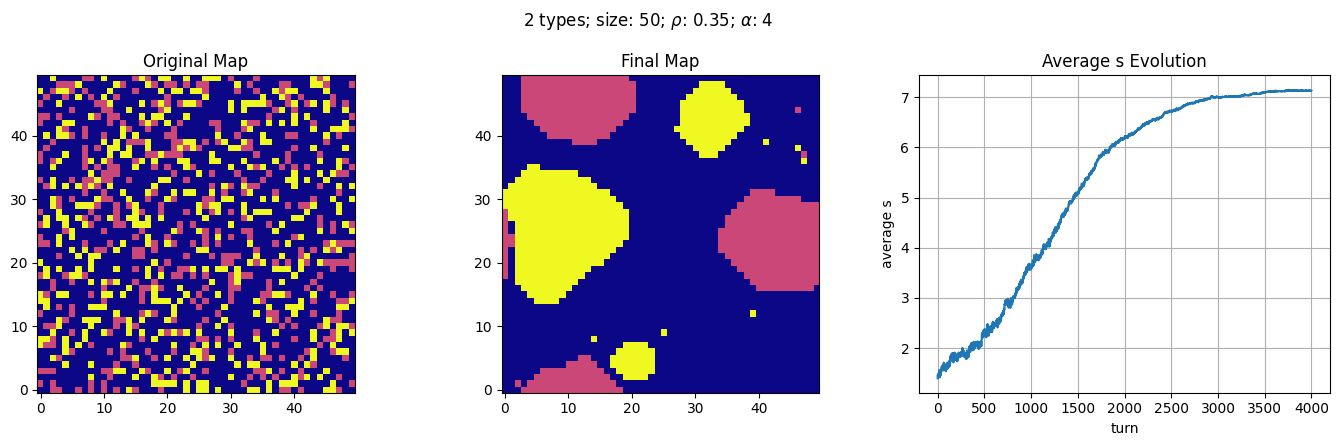

In [7]:
A = SchellingAutomaton(size=50, init_prob=0.35, min_n_neigh=4, types=[1, 2]).run(4000)
show_results(A)
# Segregacja widoczna po 2500 turach

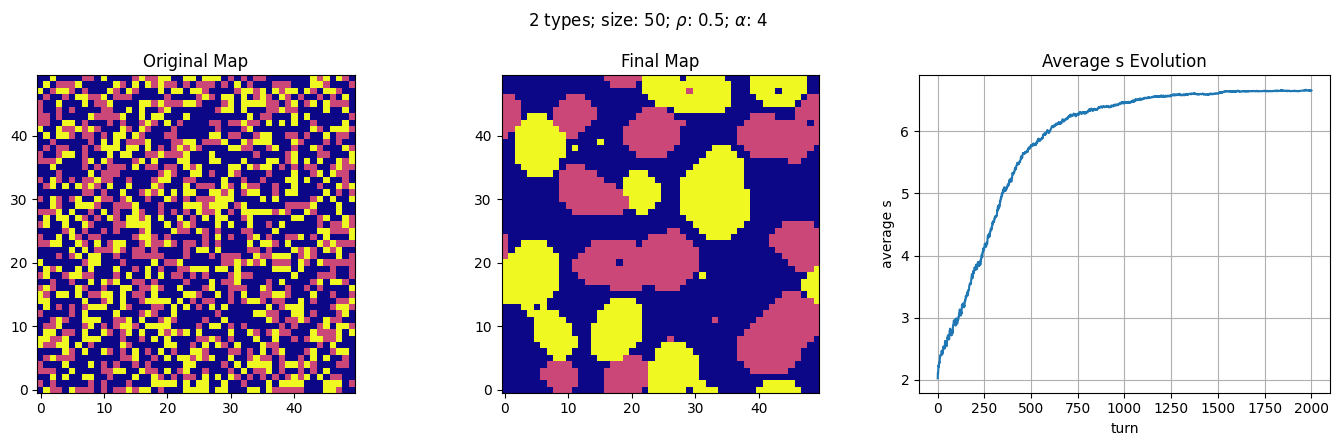

In [8]:
A = SchellingAutomaton(size=50, init_prob=0.5, min_n_neigh=4, types=[1, 2]).run(2000)
show_results(A)
# Segregacja widoczna po 800 turach

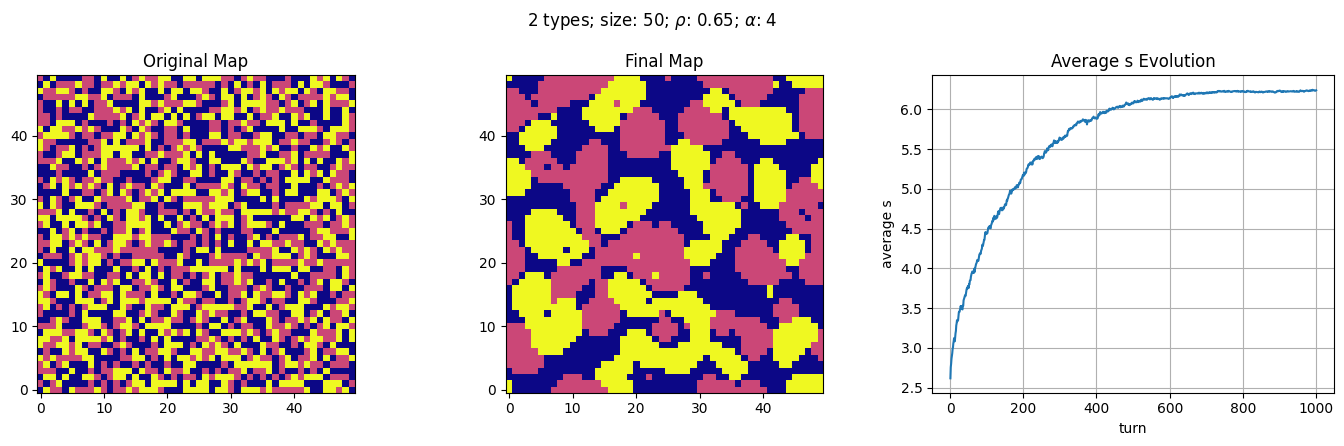

In [9]:
A = SchellingAutomaton(size=50, init_prob=0.65, min_n_neigh=4, types=[1, 2]).run(1000)
show_results(A)
# Segregacja widoczna po 500 turach

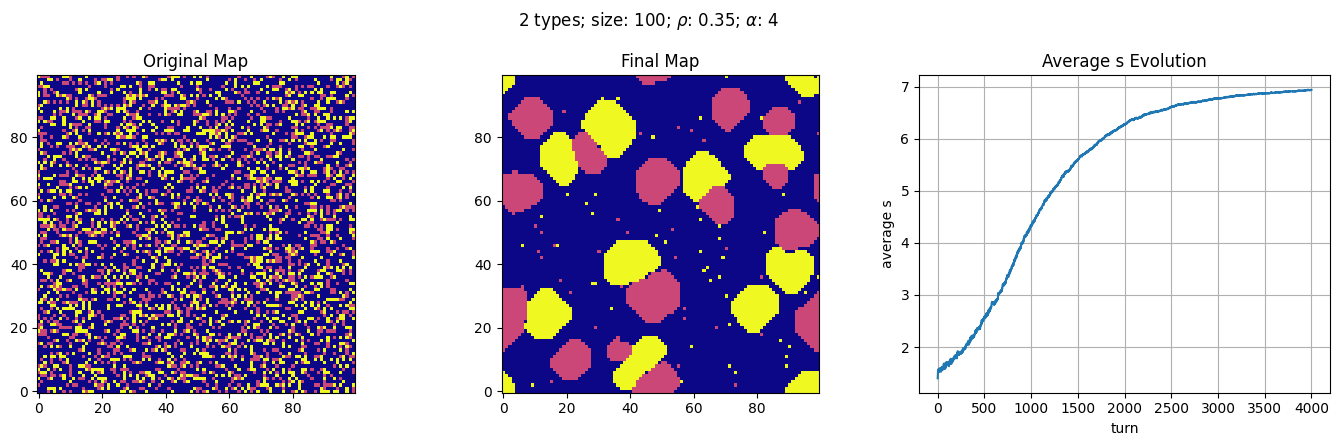

In [10]:
A = SchellingAutomaton(size=100, init_prob=0.35, min_n_neigh=4, types=[1, 2]).run(4000)
show_results(A)
# Segregacja widoczna po 2000 turach

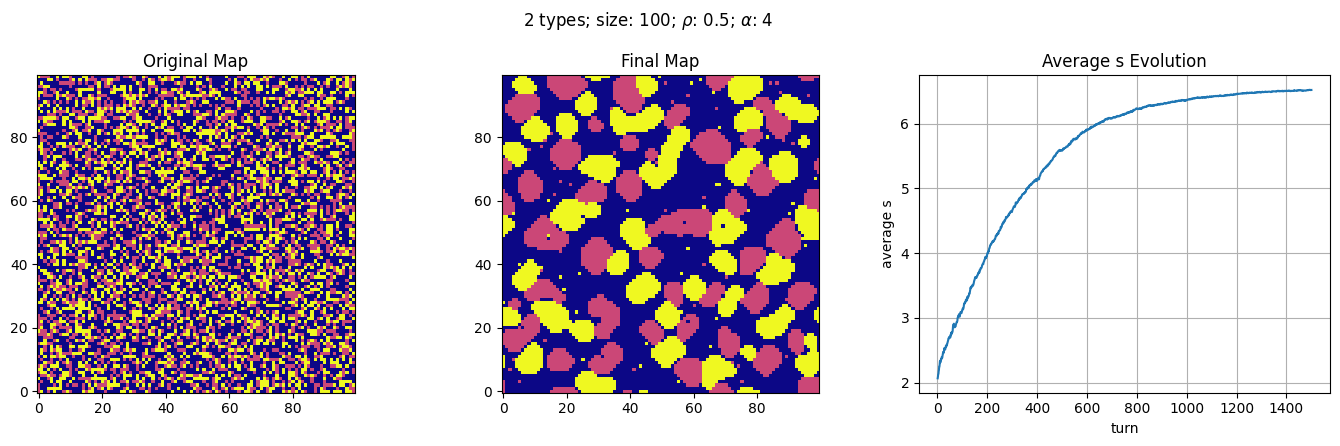

In [11]:
A = SchellingAutomaton(size=100, init_prob=0.5, min_n_neigh=4, types=[1, 2]).run(1500)
show_results(A)
# Segregacja widoczna po 800 turach

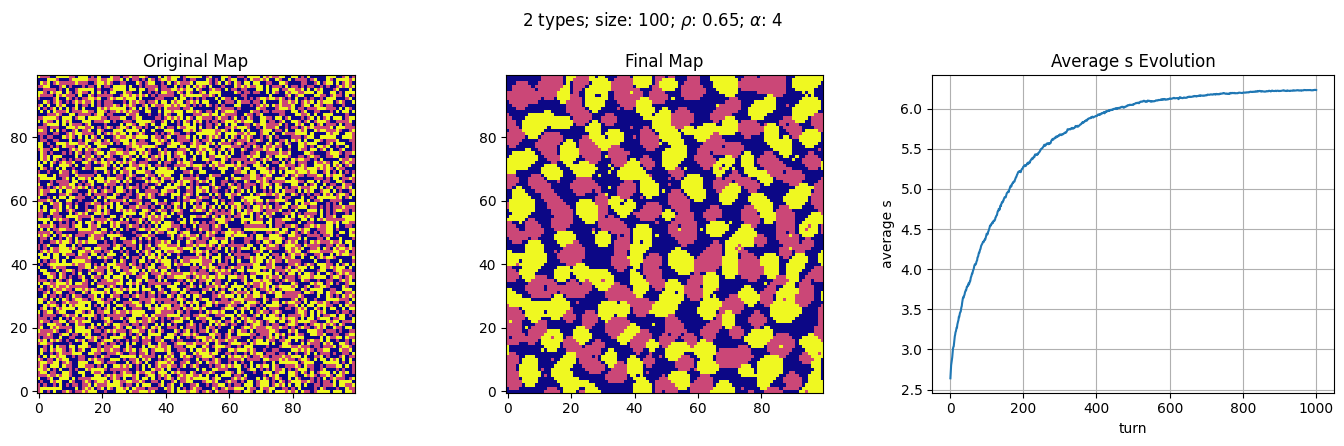

In [12]:
A = SchellingAutomaton(size=100, init_prob=0.65, min_n_neigh=4, types=[1, 2]).run(1000)
show_results(A)
# Segregacja widoczna po 600 turach

## 4 typy

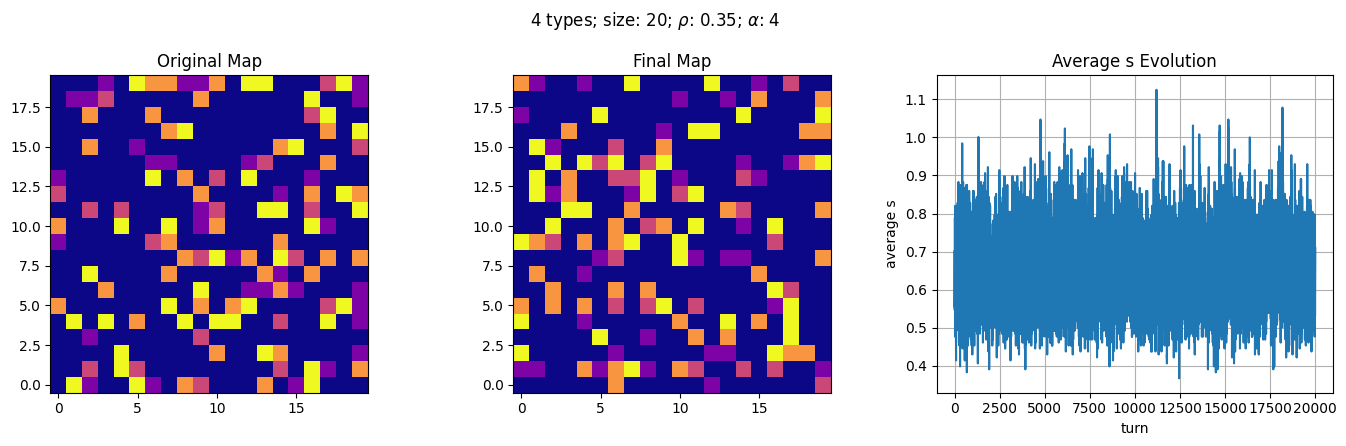

In [13]:
A = SchellingAutomaton(size=20, init_prob=0.35, min_n_neigh=4, types=[1, 2, 3, 4]).run(20000)
show_results(A)
# Brak zbieżności

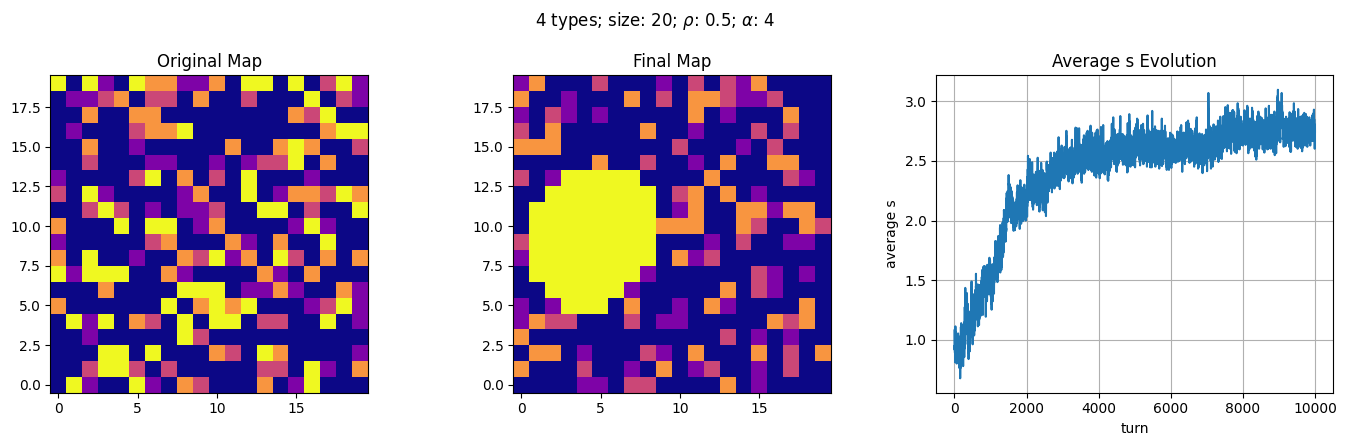

In [14]:
A = SchellingAutomaton(size=20, init_prob=0.5, min_n_neigh=4, types=[1, 2, 3, 4]).run(10000)
show_results(A)
# Segregacja widoczna po 8000 turach, ale tylko dla jednej z klas

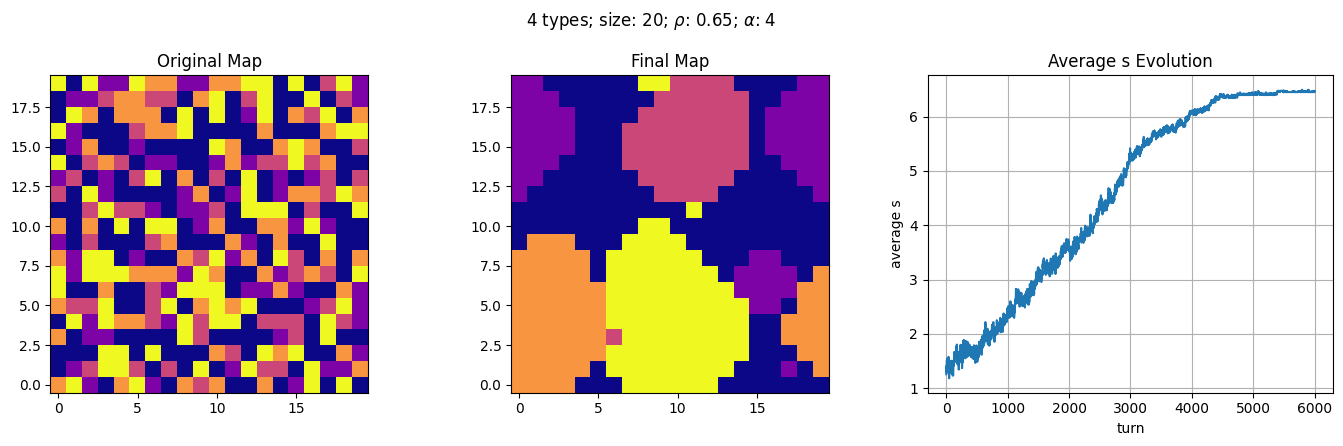

In [15]:
A = SchellingAutomaton(size=20, init_prob=0.65, min_n_neigh=4, types=[1, 2, 3, 4]).run(6000)
show_results(A)
# Segregacja widoczna po 4000 turach

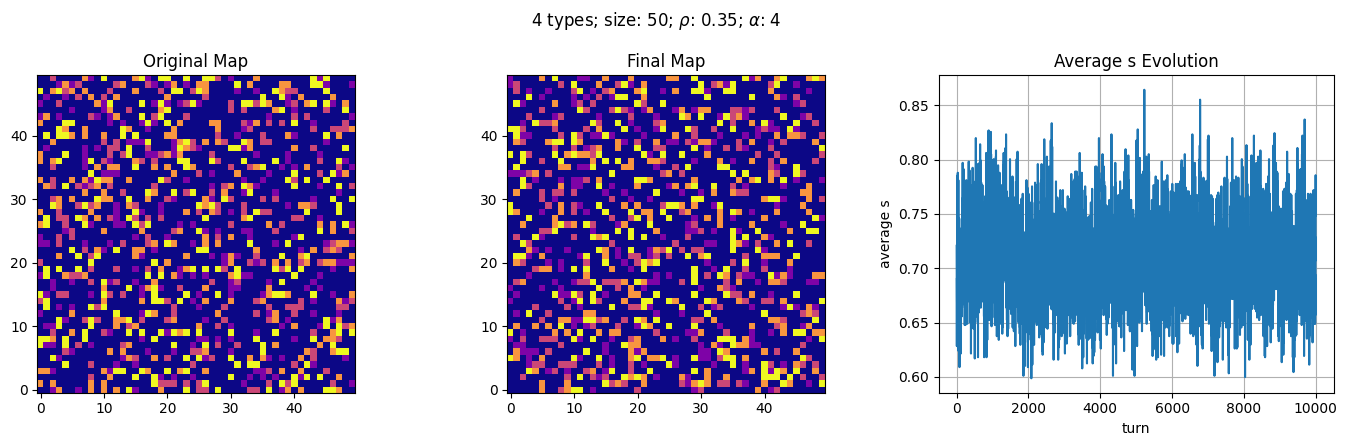

In [16]:
A = SchellingAutomaton(size=50, init_prob=0.35, min_n_neigh=4, types=[1, 2, 3, 4]).run(10000)
show_results(A)
# Brak zbieżności

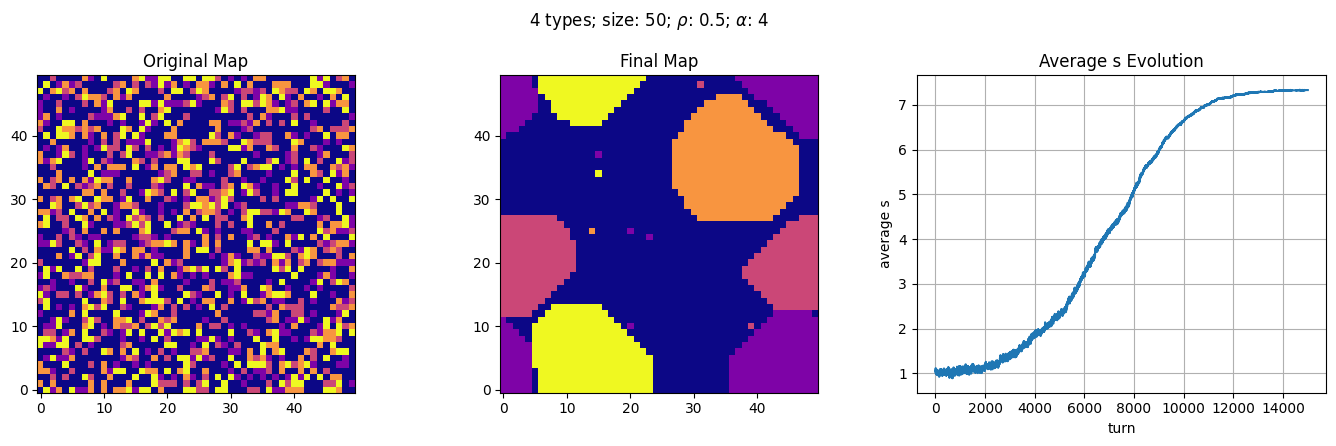

In [17]:
A = SchellingAutomaton(size=50, init_prob=0.5, min_n_neigh=4, types=[1, 2, 3, 4]).run(15000)
show_results(A)
# Segregacja widoczna po 10000 turach

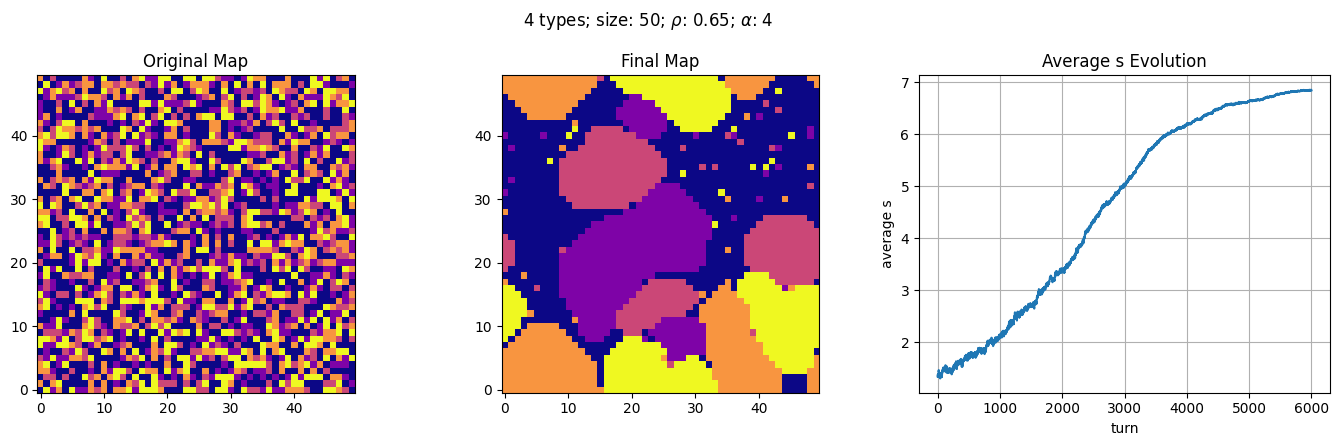

In [18]:
A = SchellingAutomaton(size=50, init_prob=0.65, min_n_neigh=4, types=[1, 2, 3, 4]).run(6000)
show_results(A)
# Segregacja widoczna po 4000 turach

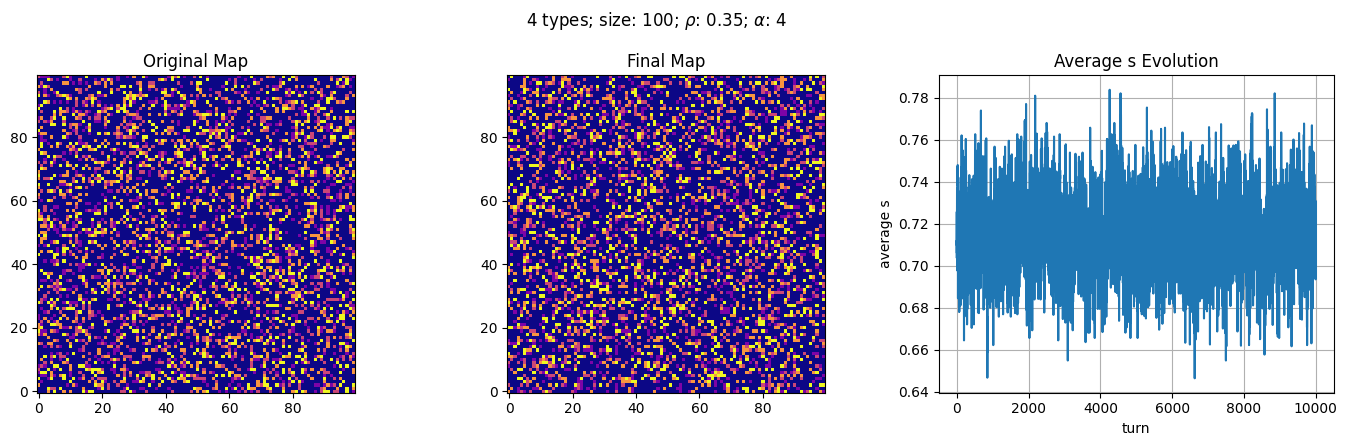

In [19]:
A = SchellingAutomaton(size=100, init_prob=0.35, min_n_neigh=4, types=[1, 2, 3, 4]).run(10000)
show_results(A)
# Brak zbieżności

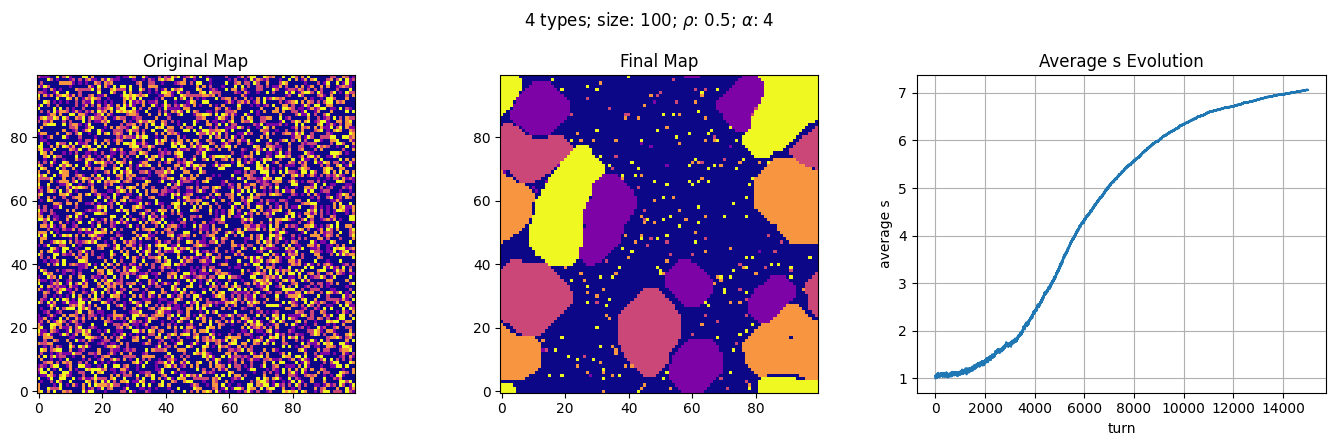

In [20]:
A = SchellingAutomaton(size=100, init_prob=0.5, min_n_neigh=4, types=[1, 2, 3, 4]).run(15000)
show_results(A)
# Segregacja widoczna po 10000 turach

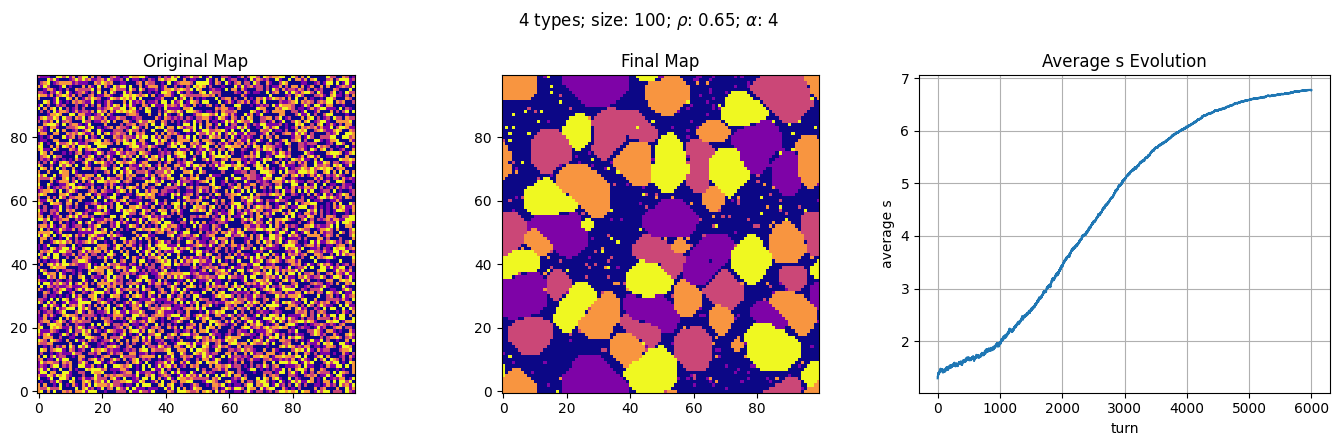

In [21]:
A = SchellingAutomaton(size=100, init_prob=0.65, min_n_neigh=4, types=[1, 2, 3, 4]).run(6000)
show_results(A)
# Segregacja widoczna po 5000 turach